In [27]:
from astropy.io import ascii
import matplotlib.pyplot as plt
from astropy.io import fits
from math import *
from math import log10

0.1998


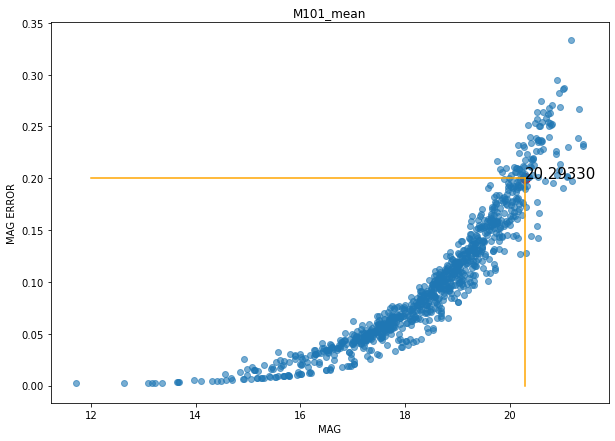

20.293300000000002


In [96]:
ob = ascii.read('/data3/yunyi/SOAO/code/M101_mean_iraf.cat')    
Me = ob['MAGERR_AUTO']
M = ob['MAG_AUTO']

#image_data=fits.open('/data3/yunyi/SOAO/fitsfiles/M101_20210604/Calib-SOAO-M101-20210604-153827-R-60.fits')
#header=image_data[0].header
#zp= header['ZP_0']
zp=25.98

p=0
pn=1
pi=0
for i in Me:
    p=abs(0.2-i)
    if p<pn:
        pn=p
        pi=i
        
print(pi)

pj=0
for i in range(len(M)):
    if Me[i]==pi:
        pj=M[i]+zp
    
plt.figure(figsize=(10,7))
plt.plot(M+zp, Me, 'o', alpha=0.6)
plt.plot([12, pj], [pi, pi], color='orange')
plt.plot([pj,pj], [pi,0], color='orange')
plt.scatter(pj, pi, s= 100, c='r')
plt.text(pj, pi, '{:.5f}'. format(pj), size=15)
plt.title('M101_mean')
plt.xlabel('MAG')
plt.ylabel('MAG ERROR')
plt.show()

print(pj)


In [1]:
def make_filelist(path):
    import os

    file=[]
    for root, directories, files in os.walk(path, topdown=False):  
        for name in files:
            extens = os.path.splitext(name)[-1]
            if extens =='.fits':
                file.append(os.path.join(root,name))
        
    return file

In [21]:
imlist=make_filelist('/data3/yunyi/SOAO/alignment/M101/0604images')

In [22]:
#imlist

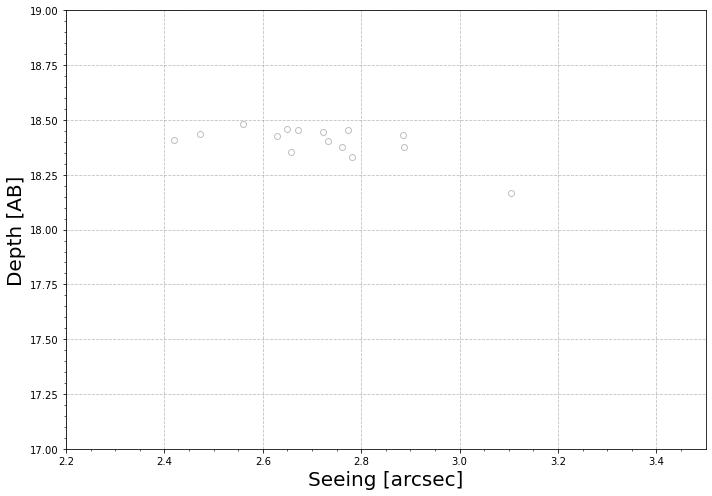

In [23]:
key_seeing = 'SEEING'
key_depth = 'UL5_1'

#	Table
from astropy.table import Table
outbl = Table()
outbl['image'] = imlist
outbl['seeing'] = 0.0
outbl['depth'] = 0.0
n_all = len(outbl)

from astropy.io import fits
#	Function
def gethdrinfo(inim, key):
	hdr = fits.getheader(inim)
	if key in hdr.keys():
		value = hdr[key]
	else:
		value = None
	return value

for i, inim in enumerate(imlist):
	outbl['seeing'][i] = gethdrinfo(inim, key_seeing)
	outbl['depth'][i] = gethdrinfo(inim, key_depth)
    
#	Plot
import matplotlib.pyplot as plt
plt.close('all')
plt.figure(figsize=(10,7))
plt.plot(outbl['seeing'], outbl['depth'], marker='o', mec='k', mfc='none', ls='none', label=f'Data ({n_all})', alpha=0.25)
plt.axis([2.2, 3.5, 17, 19])
plt.xlabel('Seeing [arcsec]', fontsize=20)
plt.ylabel('Depth [AB]', fontsize=20)
plt.grid('both', ls='--', c='grey', alpha=0.5)
plt.tight_layout()
plt.minorticks_on()
plt.show()

In [24]:
imlist=make_filelist('/data3/yunyi/SOAO/alignment/M101/select')

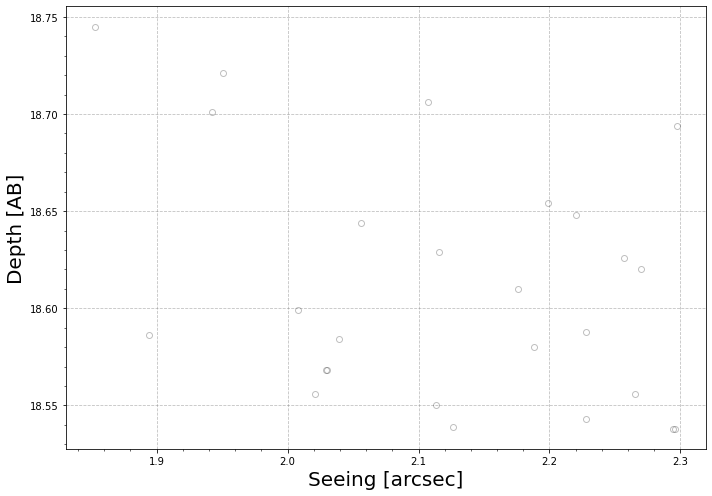

In [26]:
key_seeing = 'SEEING'
key_depth = 'UL5_1'

#	Table
from astropy.table import Table
outbl = Table()
outbl['image'] = imlist
outbl['seeing'] = 0.0
outbl['depth'] = 0.0
n_all = len(outbl)

from astropy.io import fits
#	Function
def gethdrinfo(inim, key):
	hdr = fits.getheader(inim)
	if key in hdr.keys():
		value = hdr[key]
	else:
		value = None
	return value

for i, inim in enumerate(imlist):
	outbl['seeing'][i] = gethdrinfo(inim, key_seeing)
	outbl['depth'][i] = gethdrinfo(inim, key_depth)
    
#	Plot
import matplotlib.pyplot as plt
#plt.close('all')
plt.figure(figsize=(10,7))
plt.plot(outbl['seeing'], outbl['depth'], marker='o', mec='k', mfc='none', ls='none', label=f'Data ({n_all})', alpha=0.25)
#plt.axis([1.5, 3, 18, 19])
plt.xlabel('Seeing [arcsec]', fontsize=20)
plt.ylabel('Depth [AB]', fontsize=20)
plt.grid('both', ls='--', c='grey', alpha=0.5)
plt.tight_layout()
plt.minorticks_on()
plt.show()